In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

# 데이터 불러오기 
iris = load_iris()  

#dataframe으로 변경 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

# print(iris_df) 
#타겟 추가 
#iris_df['species'] = iris.target 
#상황에 맞는 메뉴 있음 

iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.preprocessing import StandardScaler  

iris_scaled = StandardScaler().fit_transform(iris_df) # 데이터프레임의 모든 특성을 표준화
# StandardScaler()는 sklearn 라이브러리의 전처리 기능 중 하나로, 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 만드는 방법
iris_scaled 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# k-means k=3 

In [4]:
from sklearn.cluster import KMeans 

# K-평균 군집화 알고리즘 모델 생성하기
kmeans_3 = KMeans(n_clusters=3, random_state=0) # 군집화 3
kmeans_3.fit(iris_scaled) # 표준화한 iris_scaled 데이터에 KMeans 군집화 알고리즘을 적용

labels_3 = kmeans_3.labels_  # 각 데이터 포인트가 속한 군집의 레이블을 labels_3에 저장
centroids_3 = kmeans_3.cluster_centers_  # 각 군집의 중심점을 centroids_3에 저장
labels_3, centroids_3  # 데이터 포인트의 군집 레이블과 각 군집의 중심점을 출력

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32),
 array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
        [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]]))

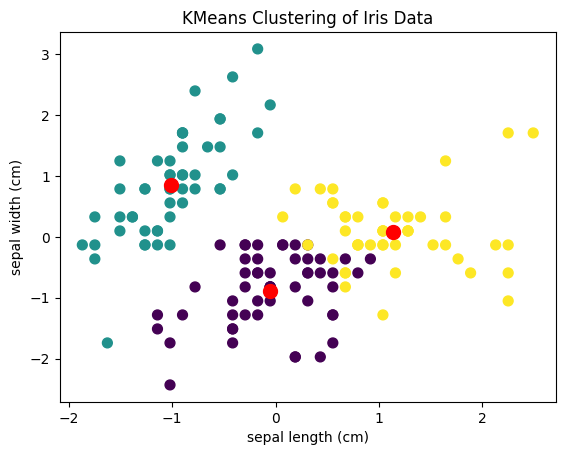

In [23]:
import matplotlib.pyplot as plt 

# iris_scaled 데이터의 '첫 번째 특성'과 '두 번째 특성'에 대한 산점도를 그립니다.
# 각 점의 색깔(c)은 해당 데이터 포인트의 군집 레이블을 나타내며, 점의 크기(s)는 50입니다.
plt.scatter(iris_scaled[:,0], iris_scaled[:,1], c=labels_3, s=50) 
# iris_scaled[:,0]는 ‘sepal length (cm)’ 특성을 나타냅니다.
# iris_scaled[:,1]는 ‘sepal width (cm)’ 특성을 나타냅니다.

# 각 군집의 중심점. 색깔(c)은 빨강, 점의 크기(s)는 100.
plt.scatter(centroids_3[:,0], centroids_3[:,1], c='red', s=100) 

# x축과 y축에 레이블을 추가합니다.
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# 차트의 제목을 추가합니다.
plt.title('KMeans Clustering of Iris Data')

plt.show() 

In [27]:
# '실루엣 점수'를 계산, 품질을 수치로 나태냄
from sklearn.metrics import silhouette_score, silhouette_samples 

# 전체 실루엣 점수 평균 계산 
silhouette_avg = silhouette_score(iris_scaled, labels_3) # labels_3는 각 데이터 포인트의 군집 레이블

silhouette_avg 

# 실루엣 점수는 -1에서 1 사이의 값 (군집 품질 측정)
#  1에 가까울수록 군집화가 잘 되었다는 것을 의미하며, -1에 가까울수록 군집화가 잘 되지 않았다는 것을 의미
#  0에 가까운 값은 군집이 겹치고 있음을 나타냅

# 레이블은 포인트가 어떤 군집에 속하는지 나타냄

np.float64(0.45994823920518635)

In [28]:
# 각 데이터 포인트의 '실루엣 점수'를 계산
sample_silhouette_values = silhouette_samples(iris_scaled, labels_3) # 배열

sample_silhouette_values[:10] # 이 배열의 처음 10개 원소를 출력 - 각 데이터포인트가 얼마나 잘 군집화 되었는지 

array([0.73419485, 0.56827391, 0.67754724, 0.62050159, 0.72847412,
       0.60988485, 0.69838355, 0.73081691, 0.48821004, 0.63154089])

In [31]:
# 각 군집 클러스터 별 평균 실루엣 점수 계산 

unique_labels = set(labels_3) # 모든 고유한 군집 레이블

silhouette_avg_per_cluster = {} # 실루엇 점수를 저장할 빈 딕셔너리

for label in unique_labels: 
    cluster_silhouette_values = sample_silhouette_values[labels_3 == label] 
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

# 결과 출력 
for label, silhouette_avg in silhouette_avg_per_cluster.items(): 
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')  

Cluster 0: Average Silhouette Score = 0.39337721055814295
Cluster 1: Average Silhouette Score = 0.6363161744392947
Cluster 2: Average Silhouette Score = 0.3473922340262053


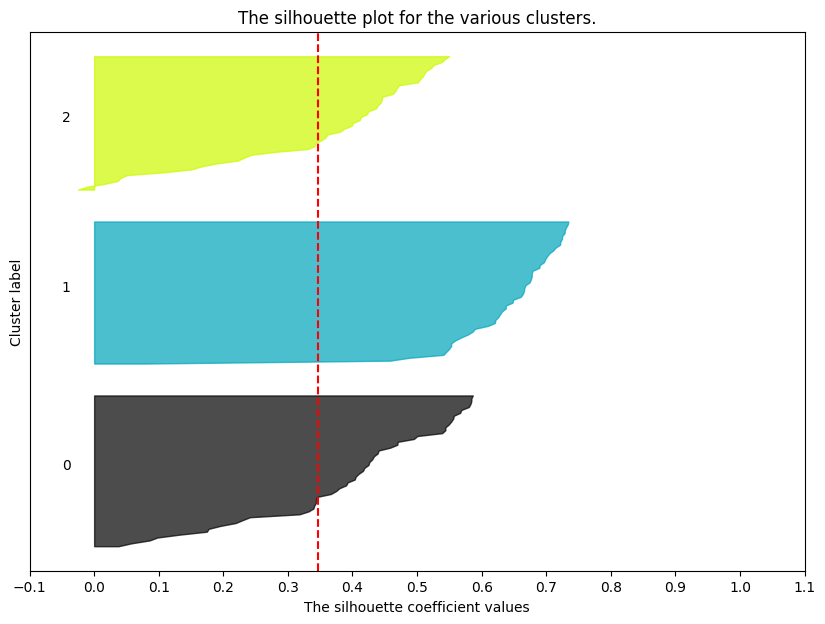

In [34]:
# 각 군집의 실루엣 점수를 시각화하는 실루엣 차트 - 군집이 얼마나 잘 군집화되었는지를 시각적으로 확인

# 각 데이터 포인트의 군집 레이블을 0, 1, 2로 변환합니다.
cluster_labels = np.choose(labels_3, [0, 1, 2]) 

fig, ax1 = plt.subplots(figsize=(10, 7)) 

# y축의 시작점을 설정합니다.
y_lower = 10 

# 각 군집에 대해 다음을 수행합니다:
for i in range(3): #클러스터 3개 
    # 현재 군집에 해당하는 데이터 포인트들의 실루엣 점수를 가져옵니다.
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 
    
    # 실루엣 점수를 오름차순으로 정렬합니다.
    ith_cluster_silhouette_values.sort()     
    
    # 현재 군집의 데이터 포인트 수를 계산합니다.
    size_cluster_i = ith_cluster_silhouette_values.shape[0] 
    
    # y축의 상한을 설정합니다.
    y_upper = y_lower + size_cluster_i  
    
    # 현재 군집의 색상을 설정합니다.
    color = plt.cm.nipy_spectral(float(i) / 3) 
    
    # 실루엣 점수에 따라 채워진 영역을 그립니다.
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 
                      0, ith_cluster_silhouette_values, 
                      facecolor=color, edgecolor=color, alpha=0.7) 

    # 군집 번호를 그립니다.
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 
    
    # 다음 군집을 그리기 위해 y축의 시작점을 이동합니다.
    y_lower = y_upper + 10

# 그래프의 제목을 설정합니다.
ax1.set_title("The silhouette plot for the various clusters.") 
# x축과 y축의 레이블을 설정합니다.
ax1.set_xlabel("The silhouette coefficient values") 
ax1.set_ylabel("Cluster label") 

# 평균 실루엣 점수를 빨간색 점선으로 그립니다.
ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
# y축의 눈금을 제거합니다.
ax1.set_yticks([]) 
# x축의 눈금을 설정합니다.
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) 


plt.show() 

# K= 2 일때

Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


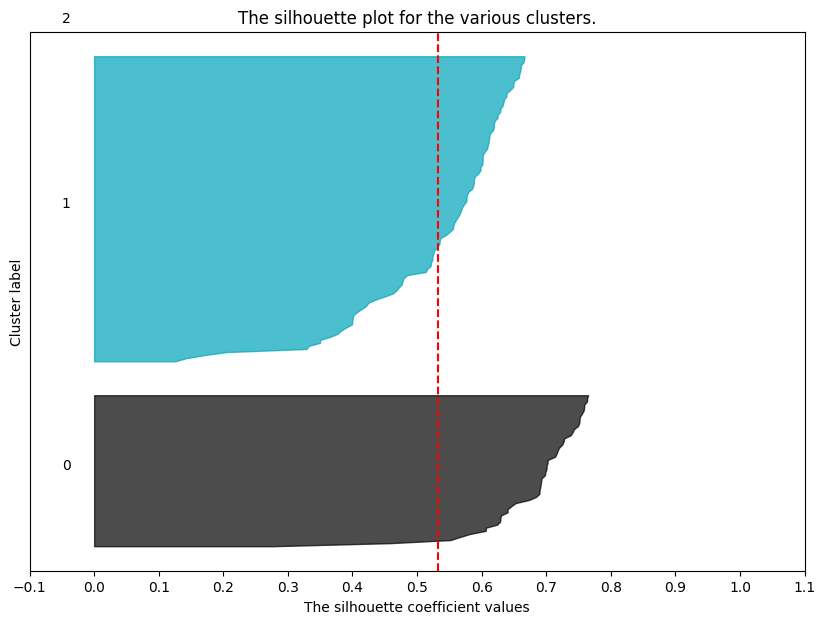

In [11]:
# sklearn의 KMeans 모듈 불로오기
from sklearn.cluster import KMeans

# KMeans 알고리즘 2개의 클러스터 생성
kmeans_2 = KMeans(n_clusters=2, random_state=0)
# iris 데이터를 학습
kmeans_2.fit(iris_scaled)

# 각 데이터 포인트의 클러스터 레이블 가져옴
labels_2 = kmeans_2.labels_
# 각 클러스터의 중심점 가져옴
centroids_2 = kmeans_2.cluster_centers_

# 실루엣 평균 점수 계산
silhouette_avg = silhouette_score(iris_scaled, labels_2)

# 각 데이터 포인트의 실루엣 샘플 값 계산
sample_silhouette_values = silhouette_samples(iris_scaled, labels_2)

# 각 클러스터의 실루엣 점수 평균 계산
unique_labels = set(labels_2)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_2 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

# 각 클러스터의 실루엣 점수 평균 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

# 실루엣 플롯 차트 그리기
cluster_labels = labels_2
fig, ax1 = plt.subplots(figsize=(10, 7))
y_lower = 10
for i in range(3): # 클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# 평균 실루엣 점수를 빨간색 점선으로 표시
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()


# PCA 분석

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pccomponents = pca.fit_transform(iris_scaled)
pccomponents

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [13]:
# 각 성분별 설명력 조회 
exp_vratio = pca.explained_variance_ 
exp_vratio 

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

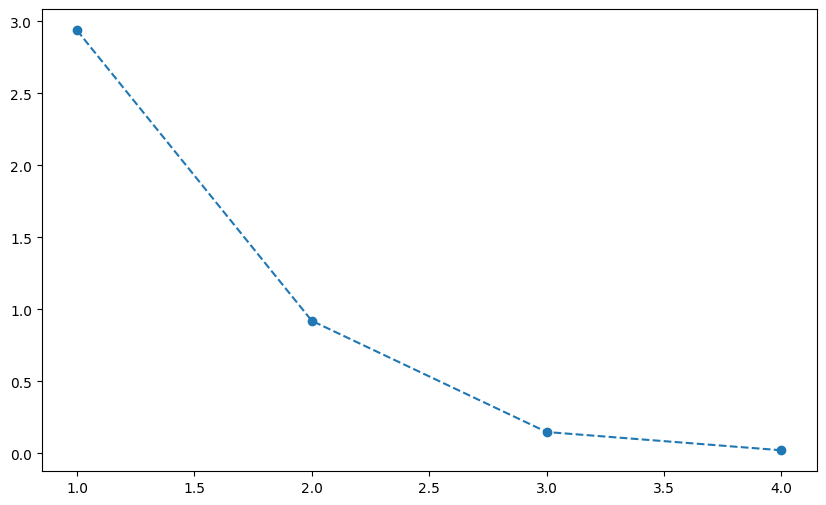

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_vratio)+1), exp_vratio, marker='o', linestyle='--')

In [15]:
# 두개싀 속성 골라서 Kmeans로 해볼겁니다

pca2 = PCA(n_components=2) # 주성분 2개로 만들어

p_comp2 = pca2.fit_transform(iris_scaled)
p_comp2_df = pd.DataFrame(data= p_comp2, columns=['PC1', 'PC2'])
p_comp2_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [16]:
#타겟 추가 
iris_df['species'] = iris.target

final_df = pd.concat([p_comp2_df, iris_df['species']], axis=1) 
final_df 

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [17]:
# KMeans k=3 짜리 모델을 만들고 실루엣 계수를 평가하는 코드

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계

# KMeans 모델 학습
kmeans = KMeans(n_clusters=3, random_state=0)

# 클러스터 라벨 예측
cluster_labels = kmeans.fit_predict(final_df)

# 실루엣 계수 계산
score = silhouette_score(final_df, cluster_labels)
samples = silhouette_samples(final_df, cluster_labels)

print(f"Silhouette Score: {score}")
# print(f"Silhouette Samples: {samples}")

Silhouette Score: 0.5020031935718893


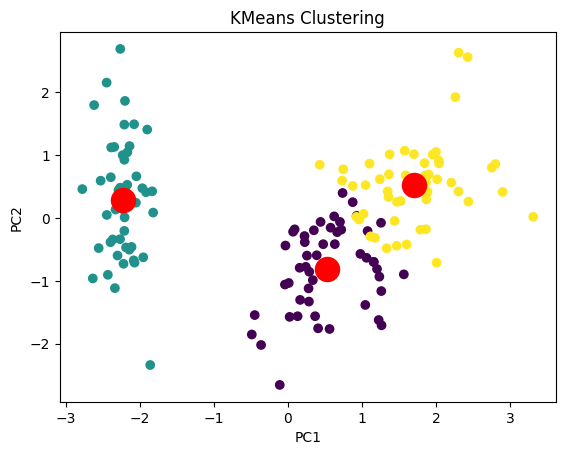

In [18]:
plt.scatter(final_df['PC1'], final_df['PC2'], c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [19]:
from sklearn.cluster import KMeans 
# K-평균 군집화 알고리즘 모델 생성하기 

k_means = [2,3] 

for k in k_means: 
    # K-평균 클러스터링 수행     
    pca_kmeans = KMeans(n_clusters=k, random_state=7) 
    cluster_labels = pca_kmeans.fit_predict(final_df[['PC1', 'PC2']]) 

    # 실루엣 점수 계산 
    silhouette_values = silhouette_samples(final_df[['PC1', 'PC2']], cluster_labels) 
    # 전체 실루엣 점수 계산 
    silhouette_avg = silhouette_score(final_df[['PC1','PC2']], cluster_labels) 
    print(f'k={k}, silhouette_score : {silhouette_avg}') 

k=2, silhouette_score : 0.6145202036230452
k=3, silhouette_score : 0.5049971595655939
